In [1]:
print(__doc__)

import os
import time
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Read Dataset
df = pd.read_csv('bank-additional.csv', sep=';')
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','y']]
print(df.shape)

# Combine similar jobs into categiroes
df['job'] = df['job'].replace(['services','housemaid','technician'], 'blue-collar')
df['job'] = df['job'].replace(['management', 'admin.'], 'white-collar')
df['job'] = df['job'].replace(['retired', 'student','unknown'], 'other')
df['job'] = df['job'].replace(['entrepreneur'], 'self-employed')

Automatically created module for IPython interactive environment
(4119, 11)


In [2]:
# New value counts
df.job.value_counts()

blue-collar      2078
white-collar     1336
self-employed     307
other             287
unemployed        111
Name: job, dtype: int64

In [3]:
df.default.value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,no
1,39,blue-collar,single,high.school,no,no,no,telephone,may,fri,no
2,25,blue-collar,married,high.school,no,yes,no,telephone,jun,wed,no
3,38,blue-collar,married,basic.9y,no,unknown,unknown,telephone,jun,fri,no
4,47,white-collar,married,university.degree,no,yes,no,cellular,nov,mon,no
...,...,...,...,...,...,...,...,...,...,...,...
4114,30,white-collar,married,basic.6y,no,yes,yes,cellular,jul,thu,no
4115,39,white-collar,married,high.school,no,yes,no,telephone,jul,fri,no
4116,27,other,single,high.school,no,no,no,cellular,may,mon,no
4117,58,white-collar,married,high.school,no,no,no,cellular,aug,fri,no


In [5]:
# Convert categorical variables to dummies
df = pd.get_dummies(data=df, columns = ['job', 'marital', 'education', 'default','housing','loan','contact','month','day_of_week'], \
                                   prefix = ['job', 'marital', 'education', 'default','housing','loan','contact','month','day_of_week'])
le = preprocessing.LabelEncoder()
df['y'] = le.fit_transform(df['y'])
df.head()

,age,y,job_blue-collar,job_other,job_self-employed,job_unemployed,job_white-collar,marital_divorced,marital_married,marital_single,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,39,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,25,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,38,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,47,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [6]:
# Create x, where x the 'scores' column's values as floats
x = df[['age']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['age'] = pd.DataFrame(x_scaled)

In [7]:
y = df['y']
df.drop(columns =['y'], inplace= True)
df

,age,job_blue-collar,job_other,job_self-employed,job_unemployed,job_white-collar,marital_divorced,marital_married,marital_single,marital_unknown,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.171429,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.300000,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,0.100000,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.285714,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.414286,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.171429,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4115,0.300000,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4116,0.128571,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4117,0.571429,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Train-Test Split

In [8]:
# Create Training and Testing Data
features=list(df.columns[0:44])
X = df[features]
print(y.value_counts(normalize=True))
print('\n')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(collections.Counter(y_train))

0    0.890507
1    0.109493
Name: y, dtype: float64


Counter({0: 2563, 1: 320})


In [21]:
X_train

,age,job_blue-collar,job_other,job_self-employed,job_unemployed,job_white-collar,marital_divorced,marital_married,marital_single,marital_unknown,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
926,0.228571,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3855,0.528571,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
997,0.214286,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3128,0.200000,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1953,0.371429,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.600000,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
466,0.328571,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3092,0.128571,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3772,0.228571,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [10]:
sns.pairplot(df,kind='scatter',diag_kind='kde')

## Correct Class Imbalance using SMOTE
Class imbalanced datasets are very common in practice. The bank marketing data used here is characterised by high class imbalance. There exists numerous techniques to remedy this, including random oversampling, random undersampling, a combination of random oversampling and undersampling among others (see [3] in the references). Training machine learning algorithms on datasets with high class imbalances can cause the trained model/s to be biased. To prevent this, we apply SMOTE (reference [2]) to correct the class imbalance.

In [22]:
from collections import Counter
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
#X_bal = pd.DataFrame(X_res, index=X_train.index, columns=X_train.columns)

Resampled dataset shape Counter({0: 2563, 1: 2563})


## Hyperparameter Tuning
Hyperparameter tuning is done to find the hyperparameters that give the optimal model configuration. We make use of sklearn's GridSearchCV to scan through a search space and return hyperparameters that optimise the model.

In [23]:
# Perform GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': np.arange(100,1000,100)},{'max_depth': np.arange(1,11)}]   
#,{'max_leaf_nodes':np.arange(0,11)},{'max_depth': np.arange(0,11)} ,{'max_depth': np.arange(0,5)}

grid = GridSearchCV(estimator=ExtraTreesClassifier(),
                       param_grid=param_grid,
                       refit=True,
                       cv=3,
                       scoring ='accuracy',
                       n_jobs= -1)
%time grid.fit(X_res,y_res)
best_score = grid.best_score_
best_params = grid.best_params_

print("Best score: %0.3f" %best_score)
print("Using the following parameters:")
print(grid.best_params_)

Wall time: 1min 50s
Best score: 0.942
Using the following parameters:
{'n_estimators': 800}


## Random Forest Model

Training Accuracy: 99.584%
Testing Accuracy: 86.974%
tn: 1060 fp: 45 fn: 116 tp: 15




<Figure size 144x144 with 0 Axes>

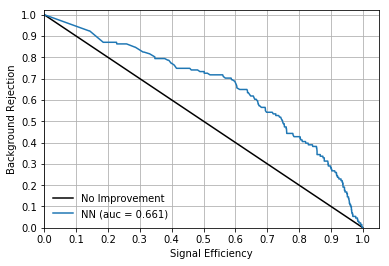

Feature ranking:
1. feature 0 (0.254741)
2. feature 40 (0.031367)
3. feature 33 (0.030547)
4. feature 21 (0.030206)
5. feature 23 (0.030005)
6. feature 42 (0.029975)
7. feature 41 (0.028422)
8. feature 7 (0.027948)
9. feature 43 (0.027301)
10. feature 39 (0.026893)
11. feature 13 (0.025466)
12. feature 16 (0.025251)
13. feature 8 (0.024905)
14. feature 34 (0.022836)
15. feature 1 (0.022709)
16. feature 5 (0.022704)
17. feature 24 (0.021197)
18. feature 26 (0.020929)
19. feature 15 (0.019369)
20. feature 35 (0.019344)
21. feature 36 (0.018603)
22. feature 32 (0.018467)
23. feature 30 (0.018133)
24. feature 6 (0.017757)
25. feature 37 (0.015596)
26. feature 12 (0.015581)
27. feature 2 (0.015276)
28. feature 10 (0.014261)
29. feature 28 (0.014187)
30. feature 27 (0.013859)
31. feature 38 (0.013796)
32. feature 29 (0.013492)
33. feature 17 (0.010838)
34. feature 3 (0.009843)
35. feature 11 (0.009804)
36. feature 4 (0.009178)
37. feature 19 (0.008782)
38. feature 18 (0.008602)
39. feature 3

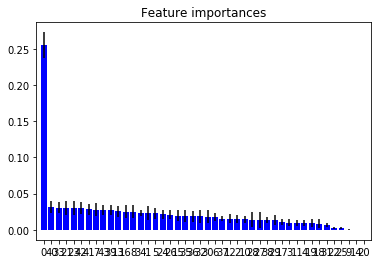

In [9]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=800,
                              random_state=7)
forest.fit(X_train, y_train)
train_pred = forest.predict(X_train)
pred = forest.predict(X_test)
pred_probab = forest.predict_proba(X_test)
ytest = y_test.values.astype(np.float64)
predictions = pred.astype(np.float64)

train_acc = np.sum(train_pred==y_train)/y_train.shape[0] * 100
test_acc = np.sum(pred==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_acc))
print("Testing Accuracy: %.3f%%" % (test_acc))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
print('tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)
print('\n')

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, pred_probab[:,1])
auc = auc(fpr,tpr)

plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='NN (auc = %0.3f)'%auc)
plt.ylabel('Background Rejection')
plt.xlabel('Signal Efficiency')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()
      
## Feature Importance
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Naive Bayes Model

Wall time: 15 ms
Training Accuracy: 53.472%
Testing Accuracy: 18.285%


<Figure size 144x144 with 0 Axes>

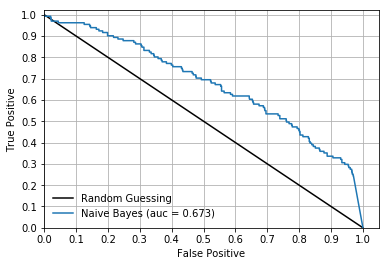

tn: 100 fp: 1005 
fn: 5 tp: 126


In [31]:
# Train NB Classifer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

nb = GaussianNB()
%time nb.fit(X_res, y_res)

# Make Predictions
train_pred = nb.predict(X_res)
test_pred = nb.predict(X_test)
pred_prob = nb.predict_proba(X_test)
ytest = y_test.values.astype(np.float64)
predictions = test_pred.astype(np.float64)
train_acc = np.sum(train_pred==y_res)/y_res.shape[0] * 100
test_acc = np.sum(test_pred==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_acc))
print("Testing Accuracy: %.3f%%" % (test_acc))

fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
auc = auc(fpr,tpr)

plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0],'k-',label='Random Guessing')
plt.plot(1-fpr,tpr, label='Naive Bayes (auc = %0.3f)'%auc)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print('tn:',tn, 'fp:',fp,'\n' 
      'fn:',fn, 'tp:',tp)

## Linear Regression Model

C:\Users\Theodore\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 83.8 ms
0.6876706984
0.652912621359
Training Accuracy: 68.767%
Testing Accuracy: 65.291%


<Figure size 144x144 with 0 Axes>

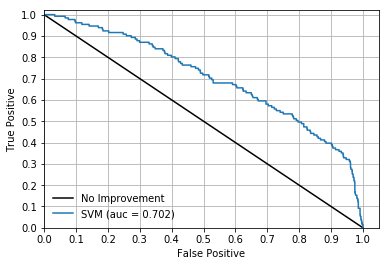

--- 0.01014089584350586 seconds ---
Automatically created module for IPython interactive environment
Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.39  0.61]]


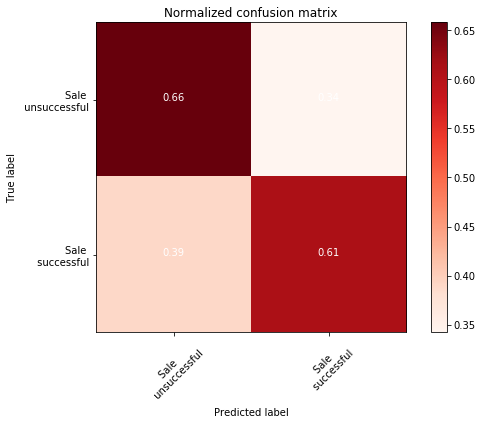

tn: 727 fp: 378 
fn: 51 tp: 80


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf = LogisticRegression()
%time clf.fit(X_res,y_res)
print(clf.score(X_res,y_res))
print(clf.score(X_test,y_test))

train_pred = clf.predict(X_res)
y_pred = clf.predict(X_test)
pred_probab = clf.predict_proba(X_test)[:,1]
ytest = y_test.astype(np.float64)
predictions = pred.astype(np.float64)
ytest = ytest.values
train_accu = np.sum(train_pred==y_res)/y_res.shape[0] * 100
test_accu = np.sum(y_pred==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_accu))
print("Testing Accuracy: %.3f%%" % (test_accu))

fpr, tpr, thresholds = roc_curve(y_test, pred_probab)
auc = auc(fpr,tpr)
plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='SVM (auc = %0.3f)'%auc)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()

import itertools
from sklearn.metrics import confusion_matrix

start = time.time()

prediction_classes = []
for i in range(len(pred_probab)):
    r = round(pred_probab[i])
    prediction_classes.append(r)
    
end = time.time()  
prediction_classes = np.asarray(prediction_classes)
print("--- %s seconds ---" %(end - start))

print(__doc__)

class_names = ["Sale \n unsuccessful", "Sale \n successful"] #Sale unsuccessful Sale successful

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest,prediction_classes)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure(figsize=(8,6))
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('tn:',tn, 'fp:',fp,'\n' 
      'fn:',fn, 'tp:',tp)

## AdaBoost Model

Wall time: 1min 10s
Training Accuracy: 96.957%
Testing Accuracy: 87.783%
tn: 1065 fp: 40 
fn: 111 tp: 20


<Figure size 144x144 with 0 Axes>

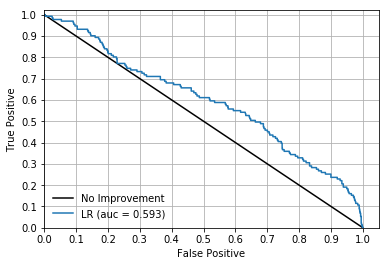

In [45]:
# Train AdaBoost Classifer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,random_state=13),
                         algorithm="SAMME.R",
                         learning_rate=0.05,
                         n_estimators=500,
                         random_state=13)
%time ada.fit(X_res, y_res)

# Make Predictions
train_pred = ada.predict(X_res)
test_pred = ada.predict(X_test)
pred_prob_ada = ada.predict_proba(X_test)
ytest = y_test.astype(np.float64)
ytest = ytest.values
predictions = test_pred.astype(np.float64)
train_accuracy = np.sum(train_pred==y_res)/y_res.shape[0] * 100
test_accuracy = np.sum(test_pred==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_accuracy))
print("Testing Accuracy: %.3f%%" % (test_accuracy))

tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print('tn:',tn, 'fp:',fp,'\n'
      'fn:',fn, 'tp:',tp)

fpr, tpr, thresholds = roc_curve(ytest, pred_prob_ada[:,1])
ada_auc = auc(fpr,tpr)
plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='LR (auc = %0.3f)'%ada_auc)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()

## Support Vector Machines Model

Wall time: 20.2 s
Training Accuracy: 68.494%
Testing Accuracy: 61.003%


<Figure size 144x144 with 0 Axes>

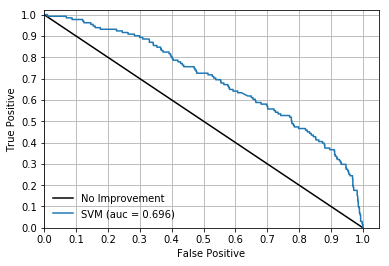

--- 0.007976055145263672 seconds ---
Automatically created module for IPython interactive environment
Normalized confusion matrix
[[ 0.64  0.36]
 [ 0.38  0.62]]


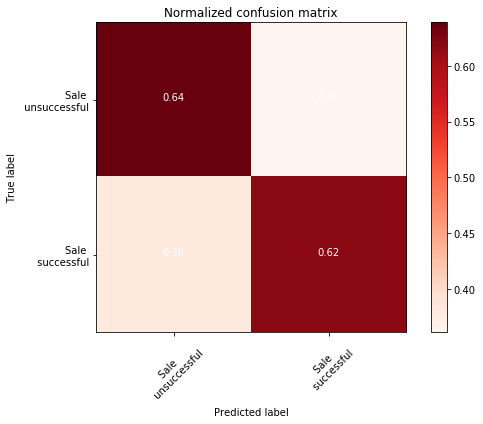

tn: 671 fp: 434 
fn: 48 tp: 83


In [66]:
# Train SVM Classifer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

svm = SVC(C=1, kernel='linear',gamma='scale',probability=True,random_state=6)
%time svm.fit(X_res, y_res)

train_pd = svm.predict(X_res)
test_pd = svm.predict(X_test)
pred_prob = svm.predict_proba(X_test)[:,1]
ytest = y_test.astype(np.float64)
ytest = ytest.values
predictions = test_pd.astype(np.float64)
train_accuracy = np.sum(train_pd==y_res)/y_res.shape[0] * 100
test_accuracy = np.sum(test_pd==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_accuracy))
print("Testing Accuracy: %.3f%%" % (test_accuracy))

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
s_auc = auc(fpr,tpr)
plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='SVM (auc = %0.3f)'%s_auc)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()

import itertools
from sklearn.metrics import confusion_matrix

start = time.time()

prediction_classes = []
for i in range(len(pred_prob)):
    r = round(pred_prob[i])
    prediction_classes.append(r)
    
end = time.time()  
prediction_classes = np.asarray(prediction_classes)
print("--- %s seconds ---" %(end - start))

print(__doc__)

class_names = ["Sale \n unsuccessful", "Sale \n successful"] #Sale unsuccessful Sale successful

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest,prediction_classes)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure(figsize=(8,6))
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, test_pd).ravel()
print('tn:',tn, 'fp:',fp,'\n'
      'fn:',fn, 'tp:',tp)

# Simple ANN Model

Wall time: 3.9 s
Training Accuracy: 84.335%
Testing Accuracy: 85.113%


<Figure size 144x144 with 0 Axes>

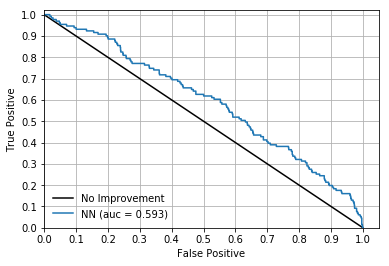

tn: 1072 fp: 33 
fn: 101 tp: 30


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

nn = MLPClassifier(solver='adam', activation='relu', learning_rate='constant', learning_rate_init=0.01,
                   hidden_layer_sizes=(24, 10), early_stopping=False, alpha=1e-4, batch_size='auto', 
                   validation_fraction=0.1, max_iter=500, verbose=False, random_state=6)
%time nn.fit(X_train, y_train)

# Make Predictions
train_prednn = nn.predict(X_res)
test_prednn = nn.predict(X_test)
pred_prob_nn = nn.predict_proba(X_test)[:,1]
ytest = y_test.astype(np.float64)
predictions = test_prednn.astype(np.float64)
ytest = ytest.values
train_accuracy = np.sum(train_prednn==y_res)/y_res.shape[0] * 100
test_accuracy = np.sum(test_prednn==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_accuracy))
print("Testing Accuracy: %.3f%%" % (test_accuracy))

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_nn)
nn_auc = auc(fpr,tpr)
plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='NN (auc = %0.3f)'%nn_auc)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print('tn:',tn, 'fp:',fp,'\n'
      'fn:',fn, 'tp:',tp)

## References
[1] Class imbalance https://www.sciencedirect.com/science/article/abs/pii/S0950705114000380 <br>
[2] SMOTE https://www.jair.org/index.php/jair/article/view/10302 <br>
[3] Random Oversampling and Undersampling https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/ <br>